In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np
sns.set_theme()

In [52]:
results_df = pd.DataFrame(
    columns=["system_name", "run_id", "latency", "operation", "on_leader", "n_nodes", "n_clients", "order_on_write", "experiment"]
            )

# for f in glob.glob("results/experiment2_False_False_20211213211523*"):
#     df = pd.read_csv(f)
#     df["experiment"] = "read_heavy"
#     results_df = results_df.append(df, ignore_index=True)

for f in glob.glob("results/experiment2_False_False*"):
    df = pd.read_csv(f)
    df["experiment"] = "read_heavy"
    results_df = results_df.append(df, ignore_index=True)

for f in glob.glob("results/experiment2_False_True*"):
    df = pd.read_csv(f)
    df["experiment"] = "write_heavy"
    results_df = results_df.append(df, ignore_index=True)

for f in glob.glob("results/experiment2_True_False*"):
    df = pd.read_csv(f)
    df["experiment"] = "read_heavy"
    results_df = results_df.append(df, ignore_index=True)

for f in glob.glob("results/experiment2_True_True*"):
    df = pd.read_csv(f)
    df["experiment"] = "write_heavy"
    results_df = results_df.append(df, ignore_index=True)

# df = pd.read_csv('results/final/perf_exp_1.csv')
# df.latency = df.latency * 10e-6
results_df.head()
df = results_df

In [53]:
agg_df = df.groupby(['experiment', 'operation', 'run_id', 'n_nodes', 'order_on_write']).latency.mean().reset_index()
agg_df["latency_factor"] = agg_df["latency"] / agg_df["n_nodes"]

In [54]:
quantiles = np.linspace(0.99, 1, 128)

q_df = df.groupby(['operation', 'run_id', 'n_nodes', 'order_on_write']).latency.quantile(quantiles).reset_index()


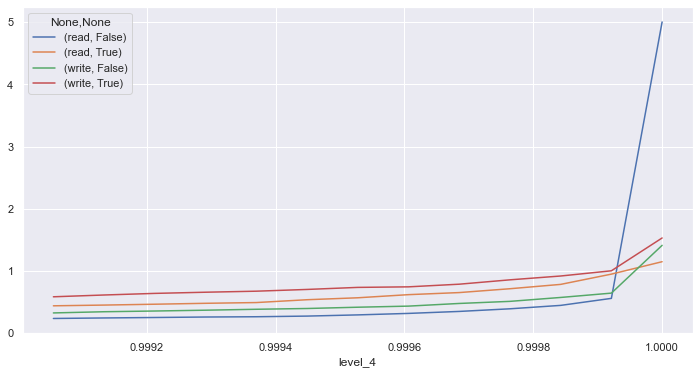

In [55]:
ax = None
for group, group_df in q_df[q_df["n_nodes"] == 4].groupby(['operation', 'order_on_write']):
    ax = group_df[group_df["level_4"] > .999].plot(x='level_4', y='latency', figsize=(12, 6), label=group, ax=ax)
    # sns.boxplot(x='n_nodes', y='latency', hue="order_on_write", data=group_df, showfliers=False)
    # plt.show()

In [56]:
print(agg_df.shape)
display(agg_df.head())

(8, 7)


,experiment,operation,run_id,n_nodes,order_on_write,latency,latency_factor
0,read_heavy,read,0,4,False,0.016139,0.004035
1,read_heavy,read,0,4,True,0.021996,0.005499
2,read_heavy,write,0,4,False,0.016052,0.004013
3,read_heavy,write,0,4,True,0.021390,0.005348
4,write_heavy,read,0,4,False,0.007633,0.001908


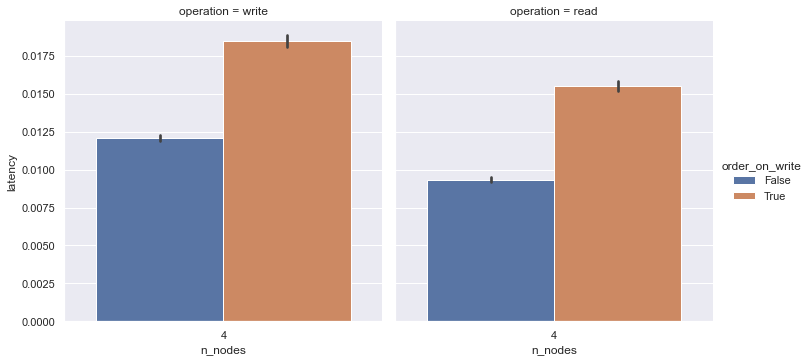

In [57]:
# ax = None
# for group, group_df in agg_df.groupby(['system_name', 'operation']):
#     label = f"order_on_write={group[0]}, operation={group[1]}"
#     ax = group_df.plot(x='n_nodes', y='speedup', figsize=(24, 6), ax=ax, label=label)

# fig, axs = plt.subplots(2, 1, figsize=(20, 12))

sns.catplot(kind="bar", x='n_nodes', y='latency', hue="order_on_write", col="operation", data=df)

# idx = 0
# for group, group_df in agg_df.groupby(['operation']):
#     # display(group_df)
#     # axs[idx].set_title(group_df.iloc[0, 1])
#     sns.barplot( x='n_nodes', y='latency', hue="operation", data=group_df)
#     plt.show()
#     idx += 1


In [58]:
agg_df_leader = df.groupby(['experiment', 'operation', 'run_id', 'n_nodes', 'order_on_write', 'on_leader']).latency.mean().reset_index()
agg_df_leader["latency_factor"] = agg_df_leader["latency"] / agg_df_leader["n_nodes"]

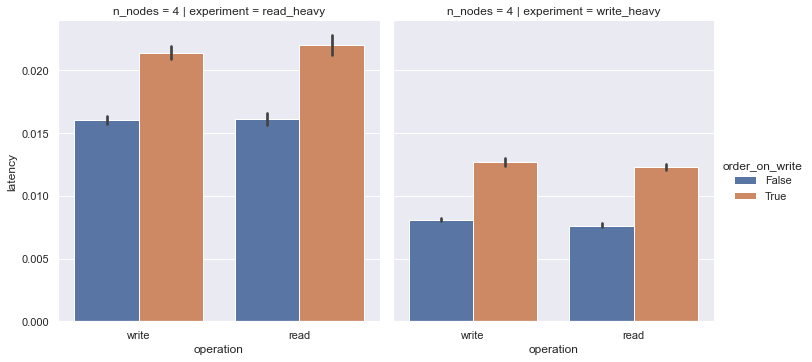

In [59]:
# fig, axs = plt.subplots(8, 1, figsize=(8, 18))

# idx = 0
# ax= None

# agg_df_leader.groupby(["experiment", "order_on_write", 'operation']).plot(kind="bar", y='latency')

g = sns.catplot(kind="bar", x="operation", y="latency", hue="order_on_write", col="experiment", row="n_nodes", data=df)
# g.set(ylim=(0, .2))
# for group, group_df in agg_df_leader.groupby(["experiment", 'operation']):
#     # display(group_df)
#     # axs[idx].set_title(group_df.iloc[0, 1])
#     # axs[idx].set_title(f"order_on_write={group[0]}, operation={group[1]}")
#     plt.title(str(group))
#     # plt.title(f"order_on_write={group[0]}, operation={group[1]}")
#     sns.barplot(x='experiment', y='latency', hue="on_leader", data=group_df)
#     # plt.show()
#     idx += 1

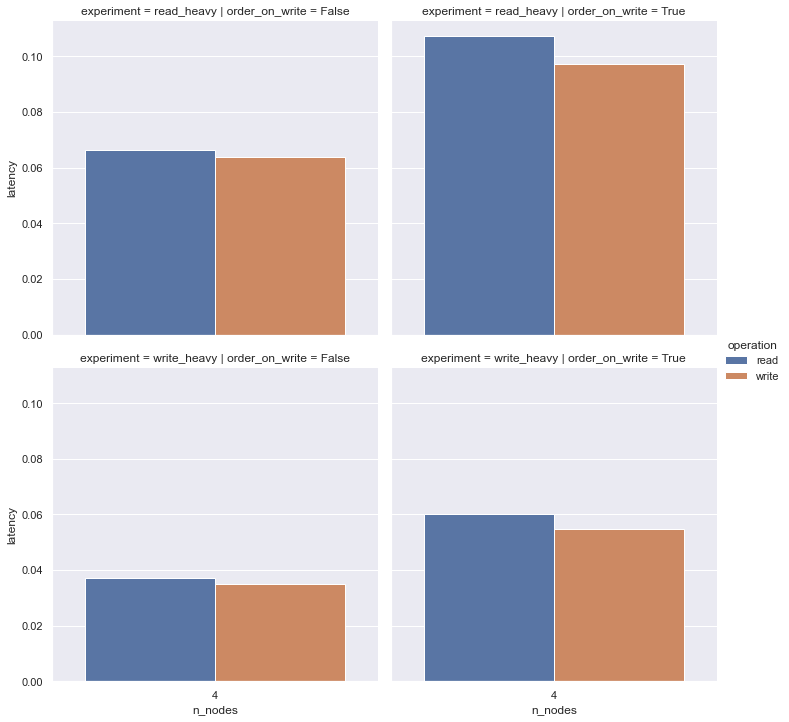

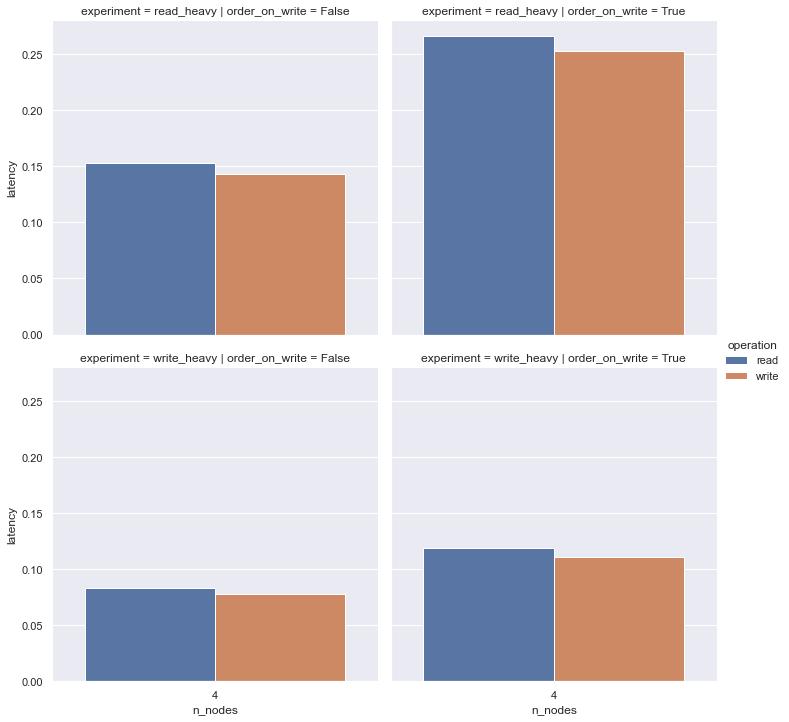

In [60]:
q_df = df.groupby(['experiment', 'n_nodes', 'order_on_write', 'operation']).quantile([0.95, 0.99]).reset_index()

# display(q_df)

sns.catplot(kind="bar", x="n_nodes", y="latency", hue="operation", col="order_on_write", row="experiment", data=q_df[q_df.level_4 == 0.95])
sns.catplot(kind="bar", x="n_nodes", y="latency", hue="operation", col="order_on_write", row="experiment", data=q_df[q_df.level_4 == 0.99])

# display(q_df)

In [61]:
sns.catplot(kind="scatter",x="n_nodes", y="latency", hue="operation", col="order_on_write", row="experiment", data=q_df)


ValueError: Plot kind 'scatter' is not recognized

In [ ]:
# def speedup(sub_df):
#     two_nodes_df = sub_df[sub_df["n_nodes"] == 2]
#     sub_df["speedup"] = sub_df["latency"] / two_nodes_df["latency"].values
#     return sub_df
#
# agg_df_with_speedup = agg_df.groupby(['order_on_write', 'operation']).apply(speedup)

# fig = ax.get_figure()
# fig.savefig('results/figures/order_before_vs_after_write.pdf')